
# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Виконайте кластеризацію по ВВП на душу населення та щільності населення.
2. Використайте метод ліктя для підбору оптимальної кількості кластерів.
3. Визначіть, який регіон домінує в кожному з кластерів.
4. Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).
5. Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Виконайте кластеризацію по ВВП на душу населення та щільності населення. </p>
</div>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Зчитую дані з файлу у датафрейм


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = pd.read_csv("clean_data2.csv", encoding='cp1252')
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Density
0,Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599,31.100793,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,6.327732,102951,57.577071,350.0,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566,2540.270209,6020.0,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213,22698.730000,527970.0,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390,4503.076000,752610.0,22.045136


Виділяю параметри для кластеризації

In [ ]:
features = df[['GDP per capita', 'Density']]
features

,GDP per capita,Density
0,561.778746,53.083405
1,4124.982390,100.038296
2,3916.881571,17.048902
3,11834.745230,277.995000
4,36988.622030,164.427660
...,...,...
212,6.327732,294.145714
213,2943.404534,756.074086
214,990.334774,52.245796
215,1269.573537,22.045136


Будую модель методом k середніх з кількістю кластерів 5

In [ ]:
kmeans1 = KMeans(
    init='random',
    n_clusters=5,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

KMeans(init='random', n_clusters=5, n_init=10)

<p>Отримані центри кластерів:</p>


In [ ]:
kmeans1.cluster_centers_

array([[12017.47051407,   185.81445875],
       [72682.28457714,  2991.06724725],
       [25288.99915571,   371.88157383],
       [ 2179.26054784,   314.9761539 ],
       [43796.79500476,   858.9640942 ]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [ ]:
kmeans1.labels_

array([3, 3, 3, 0, 4, 3, 0, 0, 3, 3, 4, 4, 3, 2, 2, 3, 0, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 2, 0, 4, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3,
       4, 4, 3, 0, 3, 3, 4, 3, 3, 0, 3, 0, 4, 3, 3, 3, 3, 3, 3, 4, 0, 1,
       3, 3, 3, 3, 1, 3, 4, 2, 3, 4, 3, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 0,
       3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 0, 0, 3, 2, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 4, 3, 4, 3, 3, 3, 2, 1, 0, 3, 0, 0, 3, 3, 3,
       3, 0, 2, 2, 1, 0, 0, 3, 3, 4, 3, 2, 3, 3, 0, 3, 4, 3, 0, 2, 3, 3,
       3, 3, 2, 3, 0, 0, 3, 3, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

<p>Візуалізую отримані кластери:</p>


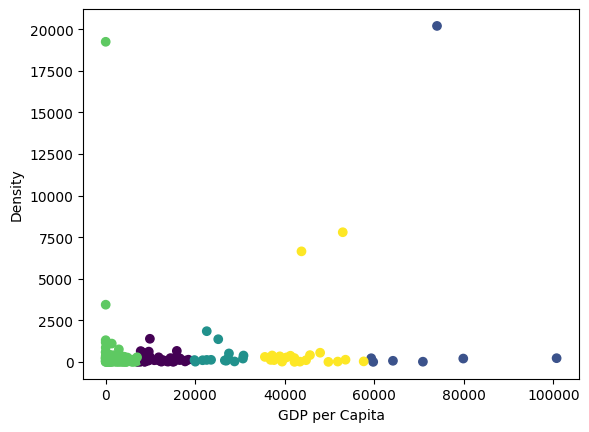

In [ ]:
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.scatter(df[['GDP per capita']], df[['Density']], c=kmeans1.labels_)
plt.show()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Використайте метод ліктя для підбору оптимальної кількості кластерів.</p>
</div>


Визначаю оптимальну кількість кластерів. Скористаюсь методом "ліктя". Для цього ініціалізую алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі рахую суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):

In [ ]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
max_kernels = 10
for k in range(1, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

<p>Візуалізую отримані результати:</p>


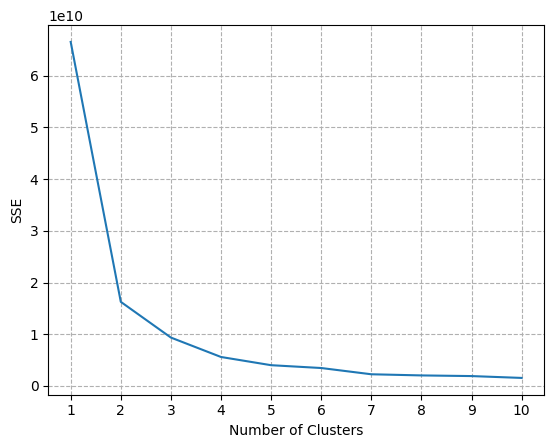

In [ ]:
plt.plot(range(1, max_kernels + 1), sse)
plt.xticks(range(1, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

<p>Оптимальна кількість кластерів дорівнює 3-4</p>
<p>Візуалізую для оптимальної кількості кластерів:</p>

In [ ]:
silhouette_coefficients = []

for k in range(2, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

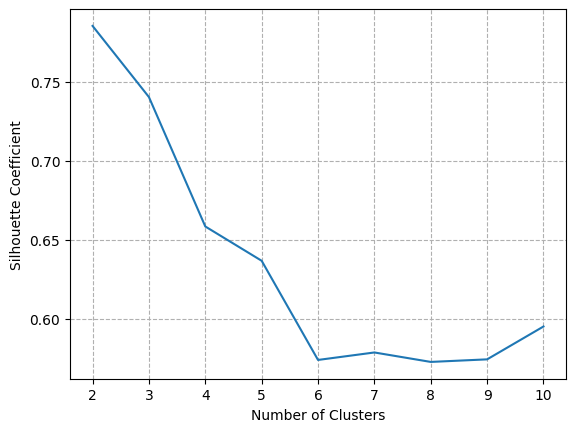

In [ ]:
plt.plot(range(2, max_kernels + 1), silhouette_coefficients)
plt.xticks(range(2, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(linestyle='--')
plt.show()

За даними двох графіків оптимальна кількість клластерів дорівнює 3.

In [ ]:
kmeans1 = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

KMeans(init='random', n_clusters=3, n_init=10)

In [ ]:
kmeans1.cluster_centers_
kmeans1.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

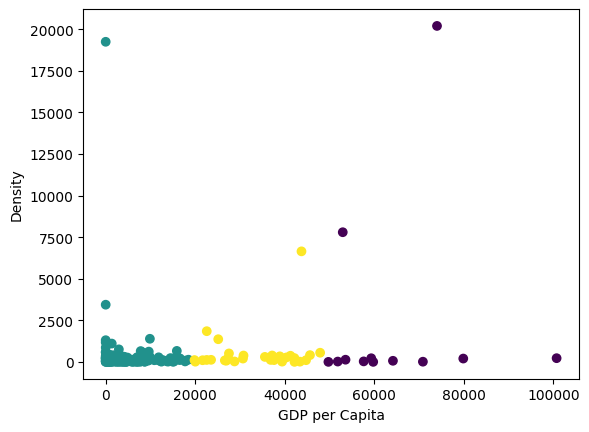

In [ ]:
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.scatter(df[['GDP per capita']], df[['Density']], c=kmeans1.labels_)
plt.show()

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Визначіть, який регіон домінує в кожному з кластерів.</p>
</div>


Додаю мітки кластерів в датафрейм

In [ ]:
from sklearn.cluster import KMeans
df['Cluster'] = kmeans1.labels_
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Density,Cluster
0,Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0,53.083405,1
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0,100.038296,1
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0,17.048902,1
3,American Samoa,East Asia & Pacific,11834.745230,55599,31.100793,200.0,277.995000,1
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0,164.427660,2


Визначаю домінуючий регіон для кожного кластера

In [ ]:
cluster_df = df[['Region', 'Cluster']]

cluster_region_counts = cluster_df.groupby(['Cluster', 'Region']).size().reset_index(name='Count')

dominant_regions = cluster_region_counts.loc[cluster_region_counts.groupby('Cluster')['Count'].idxmax()]

print(dominant_regions)

    Cluster                 Region  Count
1         0  Europe & Central Asia      7
10        1     Sub-Saharan Africa     48
12        2  Europe & Central Asia     14


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).</p>
</div>


 Обираю потрібні ознаки:


In [ ]:
all_features=pd.get_dummies(df[['GDP per capita', 'Population', 'CO2 emission', 'Area']])
all_features[['Region']] = df[['Region']]
all_features

,GDP per capita,Population,CO2 emission,Area,Region
0,561.778746,34656032,9809.225000,652860.0,South Asia
1,4124.982390,2876101,5716.853000,28750.0,Europe & Central Asia
2,3916.881571,40606052,145400.217000,2381740.0,Middle East & North Africa
3,11834.745230,55599,31.100793,200.0,East Asia & Pacific
4,36988.622030,77281,462.042000,470.0,Europe & Central Asia
...,...,...,...,...,...
212,6.327732,102951,57.577071,350.0,Latin America & Caribbean
213,2943.404534,4551566,2540.270209,6020.0,Middle East & North Africa
214,990.334774,27584213,22698.730000,527970.0,Middle East & North Africa
215,1269.573537,16591390,4503.076000,752610.0,Sub-Saharan Africa


 Розділяю датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [ ]:
df_train, df_test = train_test_split(
    all_features,
    test_size=0.2,
    random_state=1
)
df_train.head()

,GDP per capita,Population,CO2 emission,Area,Region
117,5237.147670,2081206,7510.016,25710.0,Europe & Central Asia
47,1534.973724,23695919,11045.004,322460.0,Sub-Saharan Africa
27,1.887337,30661,179.683,150.0,Latin America & Caribbean
59,4223.584579,6344722,6285.238,21040.0,Latin America & Caribbean
40,13792.926050,17909754,82562.505,756096.0,Latin America & Caribbean


<p>Розміщую цільові дані - Region -  в окремому датафреймі:</p>

In [ ]:
x_train = df_train[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_train = df_train[['Region']]

x_test = df_test[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_test = df_test[['Region']]

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- k-nearest neighbors;
- Decision Tree;
- Random Forest;
- Extra Trees;
- Gradient Boosting.

In [ ]:
def show_confusion_matrix(matrix, title):
    ax = sns.heatmap(matrix, annot=True, cmap='Greens')
    ax.set_title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    #ax.xaxis.set_ticklabels(['Negative', 'Positive'])  # тільки для 2 класів
    #ax.yaxis.set_ticklabels(['False', 'True'])         # тільки для 2 класів

    plt.show()

 <h3>k-nearest neighbors</h3>


Будую модель


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=20)
KNN_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

Оцінюю точність

In [ ]:
print('mean accuracy = ', KNN_model.score(x_test, y_test))

mean accuracy =  0.4090909090909091


In [ ]:
print(classification_report(y_test, KNN_model.predict(x_test)))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.50      0.33      0.40         9
     Europe & Central Asia       0.33      0.43      0.38        14
 Latin America & Caribbean       0.67      0.50      0.57         8
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.36      0.62      0.45         8

                  accuracy                           0.41        44
                 macro avg       0.27      0.27      0.26        44
              weighted avg       0.39      0.41      0.39        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


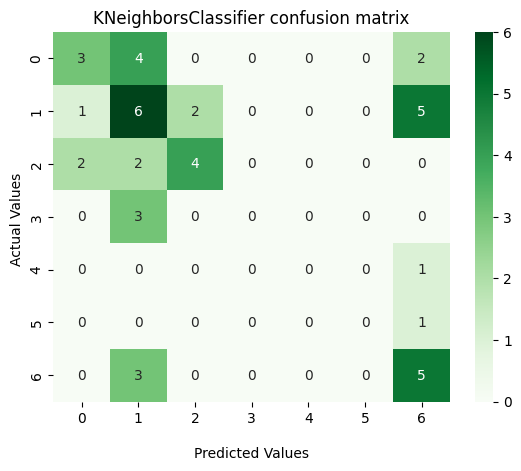

In [ ]:
show_confusion_matrix(confusion_matrix(y_test, KNN_model.predict(x_test)), 'KNeighborsClassifier confusion matrix')

 <h3>Decision Tree</h3>


Будую модель


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=9, random_state=1)
tree_scores = cross_val_score(decision_tree, x_train, y_train, cv=5)
tree_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


array([0.51428571, 0.42857143, 0.25714286, 0.44117647, 0.38235294])

In [ ]:
tree_scores.mean()

0.40470588235294114

In [ ]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=1)

Оцінюю точність

In [ ]:
decision_tree.score(x_test, y_test)

0.5227272727272727

In [ ]:
print(classification_report(y_test, decision_tree.predict(x_test)))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.75      0.33      0.46         9
     Europe & Central Asia       0.50      0.50      0.50        14
 Latin America & Caribbean       0.38      0.38      0.38         8
Middle East & North Africa       0.25      0.33      0.29         3
             North America       0.50      1.00      0.67         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.67      1.00      0.80         8

                  accuracy                           0.52        44
                 macro avg       0.43      0.51      0.44        44
              weighted avg       0.53      0.52      0.50        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


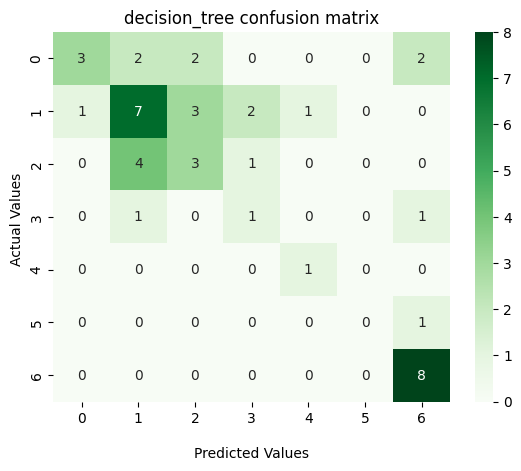

In [ ]:
show_confusion_matrix(confusion_matrix(y_test, decision_tree.predict(x_test)), 'decision_tree confusion matrix')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree,
                   feature_names=x_train.columns.tolist(),
                   class_names=np.unique(y_train),
                   filled=True)

 <h3>Random Forest</h3>


Будую модель


In [32]:
randomforest = RandomForestClassifier(max_depth=2)
random_scores = cross_val_score(randomforest, x_train, y_train, cv=5)
random_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

array([0.45714286, 0.51428571, 0.34285714, 0.5       , 0.41176471])

In [33]:
random_scores.mean()

0.4452100840336134

In [34]:
randomforest.fit(x_train, y_train)

<ipython-input-34-e1fd2dbde928>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(x_train, y_train)


RandomForestClassifier(max_depth=2)

Оцінюю точність

In [35]:
randomforest.score(x_test, y_test)

0.5

In [36]:
print(classification_report(y_test, randomforest.predict(x_test)))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.33      0.22      0.27         9
     Europe & Central Asia       0.53      0.71      0.61        14
 Latin America & Caribbean       0.60      0.38      0.46         8
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.50      0.88      0.64         8

                  accuracy                           0.50        44
                 macro avg       0.28      0.31      0.28        44
              weighted avg       0.44      0.50      0.45        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


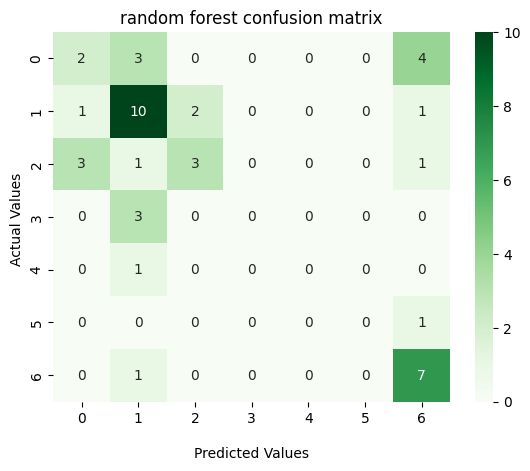

In [37]:
show_confusion_matrix(confusion_matrix(y_test, randomforest.predict(x_test)), 'random forest confusion matrix')

 <h3>Extra Trees</h3>


Будую модель


In [38]:
extratrees = ExtraTreesClassifier(max_depth=6)
extra_scores = cross_val_score(extratrees, x_train, y_train, cv=5)
extra_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

array([0.4       , 0.4       , 0.37142857, 0.47058824, 0.35294118])

In [39]:
extra_scores.mean()

0.39899159663865547

In [40]:
extratrees.fit(x_train, y_train)

<ipython-input-40-f56e48b8fe6a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extratrees.fit(x_train, y_train)


ExtraTreesClassifier(max_depth=6)

Оцінюю точність

In [41]:
extratrees.score(x_test, y_test)

0.4772727272727273

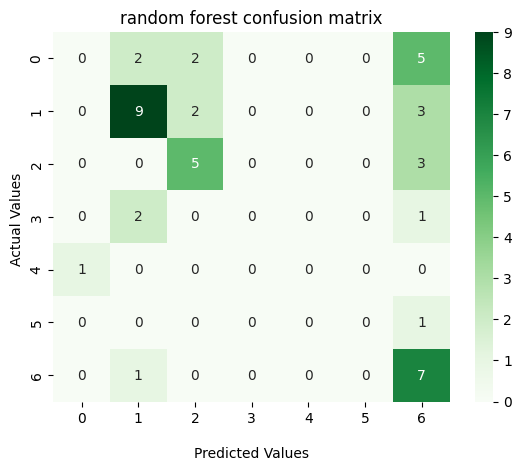

In [42]:
show_confusion_matrix(confusion_matrix(y_test, extratrees.predict(x_test)), 'random forest confusion matrix')

 <h3>Gradient Boosting</h3>


Будую модель


In [61]:
gradboost = GradientBoostingClassifier(learning_rate=0.549450)
gradboost_scores = cross_val_score(gradboost, x_train, y_train, cv=5)
gradboost_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-pack

array([0.34285714, 0.48571429, 0.34285714, 0.5       , 0.47058824])

In [62]:
gradboost_scores.mean()

0.4284033613445378

In [63]:
gradboost.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.54945)

Оцінюю точність

In [64]:
gradboost.score(x_test, y_test)

0.5909090909090909

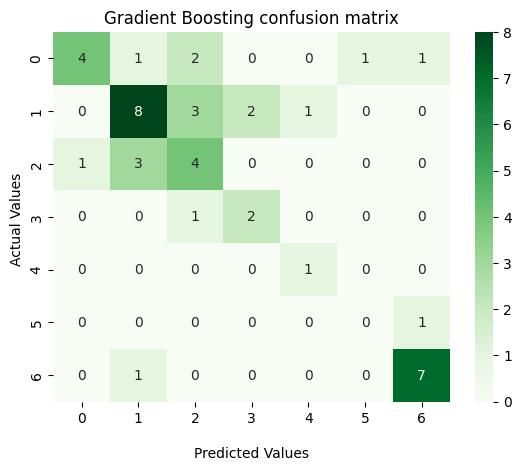

In [65]:
show_confusion_matrix(confusion_matrix(y_test, gradboost.predict(x_test)), 'Gradient Boosting confusion matrix')

<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель Gradient Boosting є найкращою</b>, адже середнє значення точності на тестових даних для цієї моделі є найвищим серед усіх (~0.59), а матриця невідповідності виглядає дуже хорошою. </p>

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.</p>
</div>


<p>Скористаюсь методом "ліктя" для визначення параметра learning_rate методу gradient boosting </p>
<p>Для цього ініціалізую алгоритм з параметром від 0 до 1 і для кожної моделі порахую усереднене значення точності:</p>

In [66]:
sse = []
for k in range(1, 101):
    gradboost = GradientBoostingClassifier(learning_rate=k/100)
    # gradboost_scores = cross_val_score(gradboost, x_train, y_train, cv=5)
    gradboost.fit(x_train, y_train)
    sse.append(gradboost.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

 Отримані показники якості візуалізую на графіку:


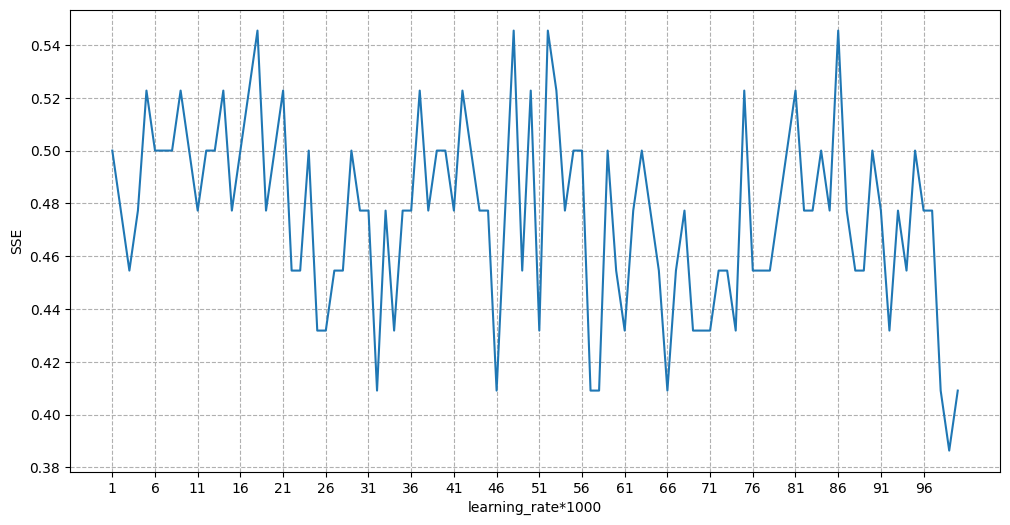

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 101), sse)
plt.xticks(range(1, 101, 5))
plt.xlabel('learning_rate*1000')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

З графіку бачу, що метод ліктя не підходить для визначення параметра learning_rate


<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Використовуючи файл <a href="https://drive.google.com/file/d/1gxqzPQNlqrwrJI3zstMsvHQAbsdMPe-2/view?usp=drive_link" target="_blank">Data5.csv</a>:

1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.
2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1.</p>
</div>


Згідно з методологією вимірювання сталого розвитку країн, сталий розвиток оцінюється за допомогою відповідного індексу у просторі трьох вимірів: економічного (Іес), екологічного (Іе) і соціально-інституціонального (Is). Цей індекс є вектором, норма якого визначає рівень сталого розвитку, а його просторове положення в системі координат (Iec,Ie,Is) характеризує міру «гармонійності» цього розвитку.

<details><summary>Натисніть тут, щоб побачити підказку до першого завдання</summary>

```python
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df

```

</details>



In [74]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = pd.read_csv('Data5.csv', encoding="windows-1251", sep=';', decimal=',').rename(columns={'Unnamed: 0': 'Country'})
df.head()

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
1,Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
2,Angola,AGO,Ангола,0.372344,0.274394,0.332117,0.346907
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
4,Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498


In [75]:
kmeans_model = KMeans(n_clusters=4, random_state=1)
df['Cluster_I'] = kmeans_model.fit_predict(df[['Ie','Iec','Is']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
print("Центри кластерів")
print(kmeans_model.cluster_centers_)

Центри кластерів за Ie, Iec, Is
[[0.26373834 0.39763907 0.40589422]
 [0.67025222 0.51146735 0.52570366]
 [0.50062486 0.43545445 0.47490056]
 [0.76853461 0.66849294 0.63963314]]


<details><summary>Натисніть тут, щоб побачити підказку до другого завдання</summary>

Номери кластерів для першого і другого методів кластеризації зовсім не обовязково співпадатимуть. Щоб знайти відповідність, подивіться в які кластери з другого методу потрапляють центри кластерів з першого.

Порахувати скільки країн потрапило в різні кластери можна з використанням матриці невідповідностей (як аргументи поставти номери кластерів для першого і другого методів кластеризації).

</details>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

<h2>Виконав студент групи ІП-хх <br> Прізвище Ім'я</h2>
